# Genel bilgiler

In [ ]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

#bir DataFrame tablosu olusturma ,asagida ciktisi var

![](2022-10-13-11-01-10.png)

In [ ]:
#bizim amacimiz 9 featuresle en iyi tahmini bulmak degildir, az featuresle mümkünse en üst düzey score bulmak önemli
#burda bazen scoru biraz düsükse bile ama features sayisi fazla isede az featuresle yorum cikarmak
#ama saglik datalarinda herbir featuresin,target üzerinde ne kadar etkisi var, onuda görmek istenebiliyor

Biraz ileri bir bilgi, fakat Label Encoder ile Get dummies farkını anlayanlar için konuşuyorum ; \
 Get dummies kullanmayı gerçek hayat projelerinde ve kaggle yarışmalarında önermiyorlar. \ 
 Bunun yerine One Hot Encoder kullanmanın ileride oluşabilecek sorunları çözeceğini söylüyorlar. \ 
 One Hot Encoder kullanımı get dummies'den çok ufak daha zor olsa da olurda ilerde \ 
 get dummies yaparak train setini değiştirdiğiniz verilerle modeliniz'i kurduktan \
 sonra test' verileriyle test'e sokarken hata alırsanız sebebi bu olabilir. Aklınızda bulunmasında fayda var

In [ ]:
svm_model = SVC(random_state=42)

_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

#Aslinda tüm olay bu, model kur tahmin yaptir ve bir degerlendirme kodu ile degerlendir
#Belki model kurarken en iyi parametlreler icin GridSearch
#ve hanginde Scaling yapip yapmayacagina bak,DecisionTree de Scaling yok



Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576


In [ ]:
#imbalance datada recall ve f1 score a bakmak gerekir
#balance olunca precision recall accuracy e bakabiliriz
#sadece accuracye bakarak yorumlamak bazen dogru olmayabiliyor

#train setinde daha düsük scorlar cikmis underfitting olmus olabilir
#trainde coguna sifir demis

#datanin iyi bir yerine gelerek te bu degerler gelmis olabilir onun icin Crosslu yapmaliyiz

In [ ]:
#eger bizim Targetlerimiz sayisal veri oldugu icin, Linear regression modeli kullanmak daha verimli olur

In [ ]:
#input yani Features ler bagimsiz degiskenlerdir,
#Output yani Target bagimli degiskenlerdir, cünkü bunlar cikti oldugu icin, inputlaradan etkileniyorlar


In [ ]:
#makina ögrenmesi algoritmalarina Estimator(Estimeetıır) denir

In [ ]:
# toarray returns an ndarray; 
# todense returns a matrix. 
#If you want a matrix, use todense; otherwise, use toarray.

In [ ]:
# Rkare -bagimsiz desikkenlerin,bagimli degiskendeki degisikligi aciklama basarisidir
#örnegin TV ve satislarin Rkaresi 0.62 cikmissa, TV,satislardaki degisimin %62 sini acikliyor
#yani bunun yüksek cikmasi iyi olur,ama her parametre eklendiginde Rkare artar ve buda yaniltici bir durumdur,
#bunun icin Adjusted R squared(ee.cass.tııd)(düzeltilmis R kare) ,gerekli olmayan herseyin atilip bulunan
#degerdir 
#F statistik ,modelin anlamliligi

In [ ]:
# Multiple linearde bagimsiz degiskenler arasinda yüksek corr varsa, bu bizim bulacagimiz 
#katsayilarin varyansini arttirir, ve yanliliga sebep olur

hiperparametrelerle ilgili bilgi

In [ ]:
#kullanaagimiz model sinifina karar verdikten sonra ,bazi parametreleri kendimiz belirleyebiliriz
#belirleyecegimiz parametrelere hiper parametre denir 
#örnegin model kurarken sabit olacak mi,model normallestirilecek mi,
#modelde kullanmak istedigin regülerlestirme seviyesi nekadar olacak
#bu gibi sorulari cevaplamak icin hiper parametreleri kulanabiliriz
#model kurulmadan önce hiper parametreler belirlenir
#hiper parametreler ön tanimli parametrelerin üzerine yazilir
#hiper parametreleri yazmazsak, default parametreler gecerli olur

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()


#iris veri setini cagirma syntaxi

iris_df = pd.DataFrame(X_train, columns = iris.feature_names)
#tirendaz da bu sekilde features isimleriyle cagirdi

NameError: name 'X_train' is not defined

# oyuncak veri olusturma 

In [ ]:
rng = np.random.RandomState(42)
x = 10*rng.rand(50)

#rand ,rastgele degerler verirken uniform yani tekdüze düzenli degerler verir,dagilimi düz olur,tepe olmaz
#model islemlerini göstermek icin basit dogrusal regresyonu kullanalim
#öncelikle matplotlib ve numpyi import edelim
# veriyi sabitlemek icin numpy daki random_state methodunu kullanaliim 

#simdide x degiskenini olusturalim
#x = 10 carpi rng.rand(50) icine 50 tane deger alacagimizi belirtmek icin 50 yazdim
#daha sonra y = 2*x eksi 1 arti rng nokta randn yazip icine 50 deger alacagimizi belirtmek icin 50 yazdik 
#simdide iki degiskenin scatter grafigini cizelim



y = 2*x-1+rng.randn(50)   

#bu 2x -1 demek daliba oluturdugumuz xleri kullanarak farkli deger olusturmak icin
#randn rastgele degerler verirken normal dagilim yapan degerler veriyor




In [ ]:
x_fit = np.linspace(0,11)
x_fit

#bunun icin predict methodu kullanilir
#bu methodu göstermek icin öncelikle   x eksenini -1 ile 11 arasinda 50 parcaya bölelim
#ve x_fit degiskenine atayalim
#simdi bu degerleri X_fite atayip, ve bir boyutlu dizi haline getirelim

#eger bunu 2D yapmak icin
X_fit =x_fit[:,np.newaxis]
X_fit[:5]

#önemli olan nokta bu iki boyutlu numpy arrayi yani dataFrame degil bunun icin head() calismadi
#ben kendim ilk besini görmek icin [:5] ekledim

# Veriyi tanimak icin yapilabilecekler

In [ ]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

    #kategoric categoric verilerin value_countlarina bakmak icin güzel bir kod

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1) #Xtest ve Ytestleri birlestirdi,yani bölünmeden önceki gibi bir DataFrame oldu
test_data["pred"] = y_pred  #bunlarida sütun olarak ekliyor
test_data["pred_proba"] = y_pred_proba[:,1]  #1 olma olasılığı
test_data.sample(10)

#burda toplu halde görmek icin yeni bir DataFRame olusturdu Concat islemi yapti,Logistic regressyon diabetes notebook'unda

In [ ]:
df.replace(['unknown'],np.nan, inplace=True)  # I replaced the 'unknown' to np.none

#burda bir kelimeyinin yerine baska bisey koyacagiz

In [ ]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

        #sütun  isimlerinde bosluk varmi diye baktik
        #yani herbirinin unique degerlerini yazdiriyoruz

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']  
#böyle ciktilar veriyor,eger bir sütunda farkli bir nokta tarzi seyler varsa onlarida gösteriyor

In [ ]:
!pip install researchpy
import researchpy as rp # Datayı daha iyi tanıya bilmek için kullanılacak bir kütüphane.

rp.summary_cat(df[["sex","smoker","day"]]) # kategorik verileri incelemek için kullanılabilecek bir kod
#value_counts farli bir hali

In [ ]:
df.Outcome.value_counts()  #burda alinan cikti asadakilerle farkli sekilde alinabilir

df.Outcome.value_counts(normalize = True)
# buda bir üsttekinin oranlar olarak görülmesi


sns.countplot(df.Outcome)
plt.show()   
#bu targeten oranlarini bar ile veriyor,kactanesi 0 ,kac tanesi 1 diye

In [ ]:
object_col=df.columns[df.dtypes=="object"]
object_col




for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)


    #value_counts() toplu halde görmek icin, object columnslari görüyoruz

In [ ]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

        #sütun  isimlerinde bosluk varmi diye baktik
        #yani herbirinin unique degerlerini yazdiriyoruz
        #toplu halde bakabiliyoruz

# veri tipini degistirme

In [ ]:
pd.to_numeric(df.TotalCharges)

#bu sekilde object olan veri tipini numeric yapabilirsin
#ama bunda hata alirsan, bunu kullan



In [ ]:
data['region'] = data['region'].astype('category')

#burda fazla cesit bile olsa icinde categorye ceviriyor

In [ ]:
data = pd.get_dummies(data)
data

#get dummies ile veri seti categorical olanlar 0 ve 1 olarak machinenin anlayacagi dile cevriliyor
#örnegin erkek olan kisinin satirinda cinsiyet_erkek = 1 cinsiyet_kadin = 0 yaziyor
#eger dogu,bati,güney.kuzey kategorileri varsa, herbiri icin olusturuyor, ve güney olan kisinin
#region_güney sütunu 1 region_bati sütunu 0.region_dogu sütunu 0 oluyor


In [ ]:
df.select_dtypes(include ="object").head() #bunuhnlada object sütunlari cagiriyoruz

for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

    #get_dummies öncesi object olan sütunlardaki farkli özellikler,bluetooth,airbag gibi seylerden kac tane oldugunu görürüz

In [ ]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

#bir sütundaki value_countta gördüklerini grafik olarak göstermek icin    

Get_dummies yapiyor sütunlar

In [ ]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [ ]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)
#sütunlari icindeki özellikleri yeni sütun yapiyor,ve ici bosalan ilk sütunlara gerek kalmiyor


df = pd.get_dummies(df, drop_first =True) #buda get_dummies tuzagi icin,birbiriyle ifade edilen sütunlari siliyor

In [ ]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price 
#yeni sütunlarin price ile olan corelasyonu


plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

#bu corr u bar ile görmek istersek

In [ ]:
df.select_dtypes("number")# numeric verileri yazdirip,bunun corr matrix cizdirdik



plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

# multicolinerity problemi burda yok

#burda verimizde Female gidi sütunda vardi. bunlar varken heatmap cizemezdik bunun icin önce 
#numericleri aldik

In [ ]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
plt.show()
#burda barplot tarzi olarak sütunlarin target ile olan corr baglantisini veriyor

![](2022-10-14-09-55-06.png)

# veri setindeki NaN eksik nan  doldurma islemleri

Tahmine dayali deger atama yöntemleri \
1-KNN ile \
2-Random Forest \
3-EM ile 

In [3]:
#pip install missingno  #aslinda buna gerek yoktu ama indirmis olduk yinede

  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns   #titanigi cagirmak icin
df = sns.load_dataset('titanic')    #veri seti geldi
df = df.select_dtypes(include = ['float64','int64']) #data icerisindeki sayisal degerlere erismek icin
print(df.head())
df.isnull().sum()   #177 age degeri null

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [2]:
# !pip install ycimpute

#### 1- KNNimput ile

In [4]:
var_names = list(df)

#knnimput bizden nparray bekliyor,bunun icin önce sütun isimlerini numpy'a cevirince 
#kaybolmasin diye bir degiskene atiyor, sonra dataFrame yaparken columns= diye verecek

In [5]:
var_names   #bunu ilerde DataFrame olustururken columns isminde cagiracaz

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [6]:
import numpy as np
n_df = np.array(df)  #veriyi nparray'e cevirdik

In [7]:
n_df[0:6]  

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583]])

In [8]:
type(n_df)

numpy.ndarray

In [9]:
from ycimpute.imputer import knnimput

dff = knnimput.KNN(k = 4).complete(n_df) #doldurma islemini yapacak

#4 komsuluk degeri,4 komsuya göre yapiyor

Imputing row 1/891 with 0 missing, elapsed time: 0.112
Imputing row 101/891 with 0 missing, elapsed time: 0.113
Imputing row 201/891 with 0 missing, elapsed time: 0.114
Imputing row 301/891 with 1 missing, elapsed time: 0.114
Imputing row 401/891 with 0 missing, elapsed time: 0.115
Imputing row 501/891 with 0 missing, elapsed time: 0.115
Imputing row 601/891 with 0 missing, elapsed time: 0.116
Imputing row 701/891 with 0 missing, elapsed time: 0.117
Imputing row 801/891 with 0 missing, elapsed time: 0.117


In [10]:
n_df[0:6]   #burda nan görüyorum ama asagida nan'i doldurmus

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583]])

In [11]:
import pandas as pd
dff = pd.DataFrame(dff,columns = var_names)

In [12]:
dff.head(6)

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000,1.0,0.0,7.2500
1,1.0,1.0,38.000,1.0,0.0,71.2833
2,1.0,3.0,26.000,0.0,0.0,7.9250
3,1.0,1.0,35.000,1.0,0.0,53.1000
4,0.0,3.0,35.000,0.0,0.0,8.0500
5,0.0,3.0,39.375,0.0,0.0,8.4583


In [13]:
dff.isnull().sum()   #nan'lar KNN ile yakindaki sayilarla dolduruldu

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

####  2-Random Forest ile nan'lari doldur

In [14]:
import seaborn as sns   #titanigi cagirmak icin
df = sns.load_dataset('titanic')    #veri seti geldi
df = df.select_dtypes(include = ['float64','int64']) #type int yapti
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [15]:
df.head(6) #age'te NaN var

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,NaN,0,0,8.4583


In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
var_names = list(df)

In [18]:
import numpy as np
n_df = np.array(df)  #veriyi nparray'e cevirdik

In [19]:
from ycimpute.imputer import iterforest   #doldurma islemine basliyoruz
dff =iterforest.IterImput().complete(n_df)

#hata vermesine ragmen doldurmayi yapiyor

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [20]:
import pandas as pd
dff = pd.DataFrame(dff,columns = var_names)

In [21]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

#### 3- EM algoritmasi ile NaN doldurma

In [4]:
import seaborn as sns   #titanigi cagirmak icin
df = sns.load_dataset('titanic')    #veri seti geldi
df = df.select_dtypes(include = ['float64','int64']) #type int yapti
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [9]:
import numpy as np
df.isnull().values.all()

False

Series([], Name: age, dtype: float64)

In [23]:
var_names = list(df)

In [24]:
import numpy as np
n_df = np.array(df)  #veriyi nparray'e cevirdik

In [25]:
from ycimpute.imputer import EM
dff = EM().complete(n_df)     ##dff np.array seklinde DataFrame cevirelim

In [26]:
import pandas as ps
dff =pd.DataFrame(dff, columns=var_names)

In [27]:
dff.isnull().sum()    #EM ile degerler doldurulmus oldu

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# Eksik veriyi Görsellestirme 

In [19]:
import missingno as msno    #görsellestirme icin

In [ ]:
msno.bar(df);      #bu bize bir bar grafigi veriyor, ve kacta kaci null oldugunu görüyoruz

In [ ]:
msno.matrix(df);  

#buda matrix seklinde null olanlari bos,olmayanlari dolu gösteriyor
#iki sütunun null'lari arasinda bir iliski olup olmadiigni görüyoruz

In [21]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [22]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

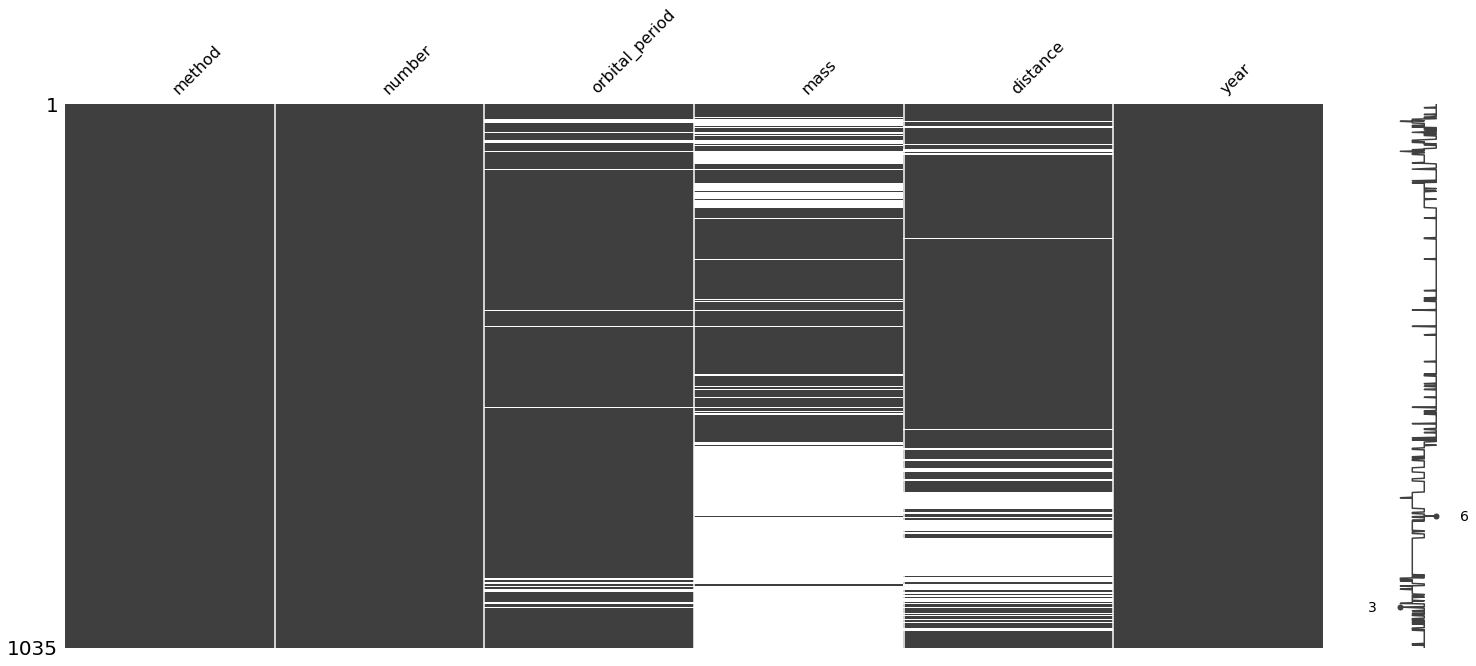

In [24]:
msno.matrix(df);

#iki sütun arasinda bir bagimlilik varmi,kredi karti ögregindeki gibi
#sagda 6,ayni anda en fazla 6 sütun dolu,3 en fazla üc sütun bos bilgisini veriyor

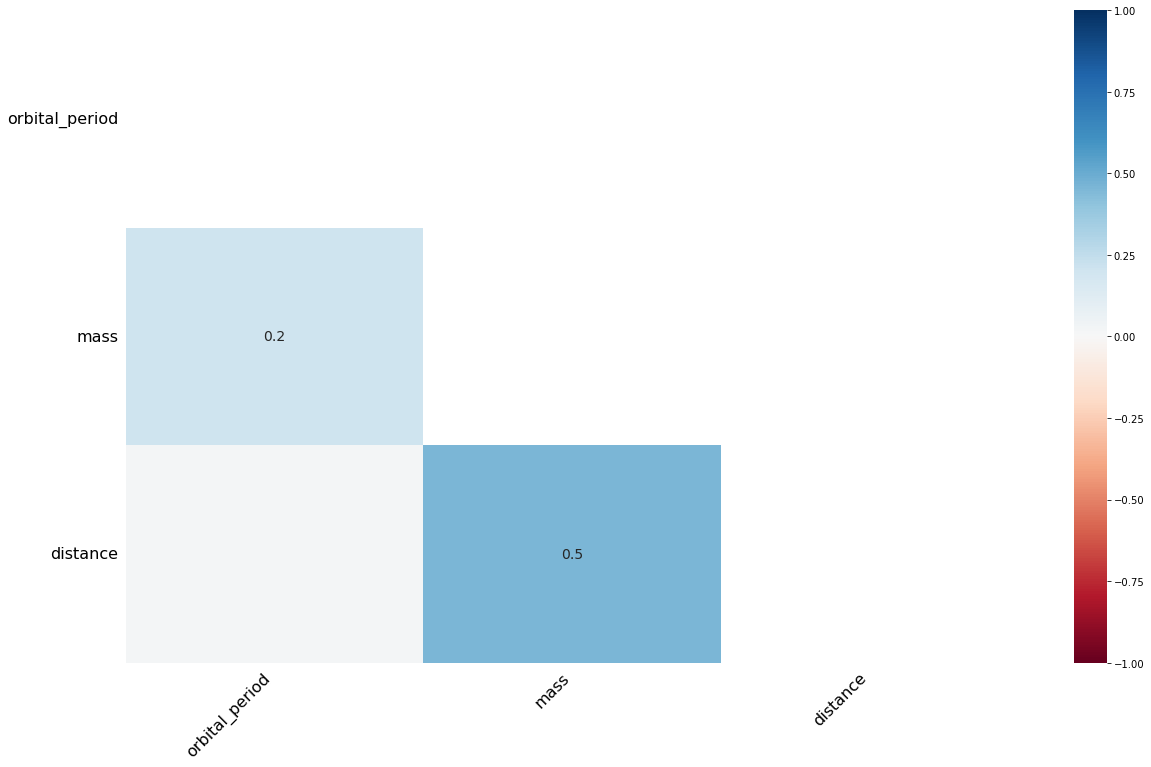

In [26]:
msno.heatmap(df);
#buda yukaridaki bagimliligin heatmap sekli

## Mapping islemi

In [ ]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()


# mapping islemi verileri isimlendirmek icin,    

# Outlier tespit ve düzeltme  islemi

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

#herbir sütuna göre boxplot degerelerini gördük,Outcome 0 ve 1 lerden olusan target sütunu

In [28]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64']) #sadece nümeric degerler geldi
df = df.dropna()       #outlier bulacagimiz icin simdilik NaN ile ugrasmayalim dedik
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [29]:
df.shape

(53940, 7)

In [30]:
df.isnull().sum()    #yukarida dropna() ile temizledik

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [31]:
df_table = df.table    #table sütununu aldik
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

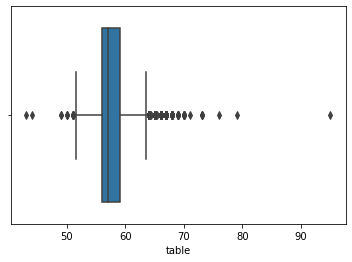

In [32]:
import seaborn as sns

sns.boxplot(x=df_table);

#burda Q1,Q2,Q3 degerleri var boxplotta

In [52]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')

Q1 = 56.0
Q3 = 59.0


In [53]:
IQR = Q3 - Q1
IQR     #bu boxplotun ortasi

3.0

In [54]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print(f'alt_sinir = {alt_sinir}')
print(f'ust_sinir = {ust_sinir}')   #bu sinirlar disinda kalanlar outlier

alt_sinir = 51.5
ust_sinir = 63.5


In [36]:
df[(df_table < alt_sinir) | (df_table > ust_sinir)]   #outlier'lar 

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [37]:
df.table[(df_table < alt_sinir) | (df_table > ust_sinir)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [38]:
df.table[(df_table < alt_sinir) | (df_table > ust_sinir)].index

#sadece index numalarini görmek istersen

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

## Outlier'dan kurtulma yöntemi

1- Silme yöntemi

In [39]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64']) #sadece nümeric degerler geldi
df = df.dropna()       #outlier bulacagimiz icin simdilik NaN ile ugrasmayalim dedik
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [40]:
df_outlier = df[(df_table < alt_sinir) | (df_table > ust_sinir)]  #alt_sinir yukarda olusturduk
df_outlier

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [41]:
df_outliersiz = df[~((df_table < alt_sinir) | (df_table > ust_sinir))] #bu sekilde data disinda biraktik

In [42]:
df_outliersiz

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='table'>

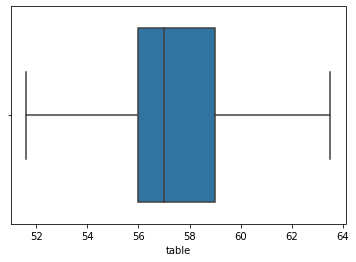

In [43]:
sns.boxplot(x=df_outliersiz.table)  #temizlendi

In [44]:
df_outliersiz.table.max()

63.5

2- Mean ile doldurma

In [45]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64']) #sadece nümeric degerler geldi
df = df.dropna()       #outlier bulacagimiz icin simdilik NaN ile ugrasmayalim dedik
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [46]:
df_outlier = df[(df_table < alt_sinir) | (df_table > ust_sinir)]  #komple DataFrame

In [47]:
df_table.mean()

57.45718390804603

In [48]:
df_outlier.table = df_table.mean()   #ortalama ile doldurmus oldum

/var/folders/9_/vpq34lwj3bv0yhs22t_s7s7w0000gn/T/ipykernel_3038/1601526471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier.table = df_table.mean()   #ortalama ile doldurmus oldum


In [49]:
df_outlier

,carat,depth,table,price,x,y,z
2,0.23,56.9,57.457184,327,4.05,4.07,2.31
91,0.86,55.1,57.457184,2757,6.45,6.33,3.52
145,0.70,62.1,57.457184,2767,5.62,5.65,3.50
219,0.53,57.5,57.457184,2782,5.34,5.37,3.08
227,0.84,55.1,57.457184,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,57.457184,2717,5.85,5.80,3.48
53697,0.70,64.5,57.457184,2717,5.52,5.45,3.54
53756,0.84,55.6,57.457184,2724,6.42,6.32,3.54
53757,0.72,55.4,57.457184,2724,6.06,5.97,3.34


3-Baskilama yöntemi

In [50]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64']) #sadece nümeric degerler geldi
df = df.dropna()       #outlier bulacagimiz icin simdilik NaN ile ugrasmayalim dedik
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [57]:
df_outlier_left = df[(df_table < alt_sinir)]

In [58]:
df_outlier_left = alt_sinir

In [59]:
df_outlier_left

51.5

In [60]:
df_outlier_right = df[(df_table < ust_sinir)]

In [61]:
df_outlier_right = ust_sinir

In [62]:
df = df_outliersiz + df_outlier_left + df_outlier_right

<AxesSubplot:xlabel='table'>

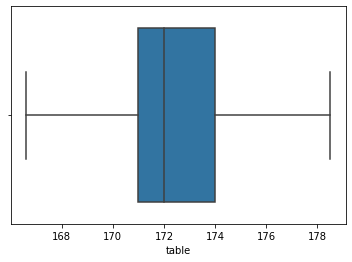

In [63]:
sns.boxplot(x=df.table)  

#outlier'lar temizlenmis ve baskilanmis oldu

In [86]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [87]:
df.fillna(method='bfill')

,maas,departman
0,1.0,IT
1,3.0,IK
2,6.0,IK
3,7.0,IK
4,7.0,IK
5,1.0,IK
6,9.0,IK
7,9.0,IT
8,15.0,IT


# Cok degiskenli Outlier analizi

1- silme islemi

In [ ]:
# yas 17 normalde sütunda outlier olmaz, evlilik sayisi 3 te outlier olmaz
#ama bunlar ayni satirdaysa, bulundugu nokta konumu diger yasitlarindan uzak olacagi icin,
#buna az puan veriyor ve outlier oluyor
#adindanda belli Local yani onun yeriyle ilgili, Vahit hoca bir foto göstermisti

In [65]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor   #LOF yöntemi

In [66]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1) # contamination yogunlugu gösteriyormus

In [67]:
clf.fit_predict(df) 

#herbir göylem icin elde edilmis scorlar

array([-1, -1, -1, ...,  1,  1,  1])

In [68]:
df_score = clf.negative_outlier_factor_

In [69]:
df_score

array([-1.68008778, -1.69836424, -1.38003185, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [70]:
type(df_score)

numpy.ndarray

In [72]:
np.sort(df_score)[:5]    #-8 ile baslayan en outlier olan

array([-8.60430658, -8.20862437, -5.86084355, -4.3719035 , -4.30124813])

In [75]:
esik_deger = np.sort(df_score)[13]  #diyorum ki bu esik deger olsun,bunun altindakiler ve üstündekiler
esik_deger

-3.4506605564574615

In [79]:
LOF_outlier = df[df_score < esik_deger]
LOF_outlier

#burda tek yönlü olan boxplot'a göre daha az outlier cikti

,carat,depth,table,price,x,y,z
6341,116.00,159.0,168.0,4147.0,121.31,121.24,119.12
10377,116.09,158.0,169.0,4893.0,121.53,121.55,119.12
24067,117.00,173.9,172.0,12325.0,123.09,173.90,123.06
31230,115.45,183.6,172.0,871.0,119.73,119.50,118.19
34581,115.50,183.6,171.0,986.0,119.87,119.75,118.30
38053,115.34,169.0,171.0,1127.0,119.80,119.76,117.58
38840,115.73,185.8,170.0,1164.0,120.51,120.34,118.84
41918,116.03,193.2,169.0,1377.0,120.72,120.59,119.42
45688,115.70,186.6,170.0,1811.0,120.47,120.28,118.85
46665,115.97,183.5,169.0,1902.0,121.26,121.05,119.22


In [78]:
yeni_df = df[df_score > esik_deger]   
yeni_df.head()

#df_score negatif degerler oldugu icin > dedikce pozitife gidiyor,ve outlier olmuyor

,carat,depth,table,price,x,y,z
0,115.23,176.5,170.0,441.0,118.95,118.98,117.43
1,115.21,174.8,176.0,441.0,118.89,118.84,117.31
3,115.29,177.4,173.0,449.0,119.20,119.23,117.63
4,115.31,178.3,173.0,450.0,119.34,119.35,117.75
5,115.24,177.8,172.0,451.0,118.94,118.96,117.48


# veriyi modele hazir hale getirme

In [ ]:
y = data['charges']
X = data.drop('charges' , axis =1) #icinde charge olmayanlari aliyor

#bu sekilde y olanlar bagimli degisken yani sonuclar oldu
#X olanlarda bizim Featureslerimiz oldu

#X bizim charges haric tüm sütunlarimiz ve biz bunu biraz sonra train ve test olarak ikiye bölecegiz
#ve y degiskenimiz ise bizim sonuclarimiz bu veri setinde saglik icin yapilan harcamalar 
#birazdan bunu da ikiye bölecegiz 

In [ ]:
#veri setini Training ve test diye ayirmak icin  sklearn kütüphanesini kullaniyoruz.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 1)
#bu sekilde verileri %80 train ve %20 test verileri olarak bölüyorum
#random_state parametresi kullnilan verileri sabitlemek icin kullanilir
#eger bende bu parametreyi kullanirsam, bende hocanin buldugu sonuclarin aynisini bulabilirim


In [ ]:
rng = np.random.RandomState(42)
x = 10*rng.rand(50) 
#x i böyle olusturmustu





X = x[:,np.newaxis]  #newaxis iki boyuta cikariyor array'i
X[:5]  #ilk besini görmek isteedim, bu iki boyutlu array oldugu icin head() olmuyor


#burda yukaridakinden farkli olarak her birini köseli parantez icine aldi
# boyut eklemis diyebiliriz
#asagida bir denemeyle sebebini ögrendim,eger x i boyut ekleyip X e dönüstürmezsem, hata veriyor
#ve 2D olan bir veri gir gir diyor
#biz iris le falan calisirken, onlar zaten DataFrame olarak geliyorlar

#ValueError: Expected 2D array, got 1D array instead:

#bu sekilde iki boyutlu features matrisi olusturmus olduk
#bu X te 50 tane örneklem ve bir tane feature var

In [ ]:
model.coef_
#aslinda bu bizim denklemimizin egimi, yani galiba a katsayisidir(coefficient)

#sklearnde modelin attribute'larina alt tire eklenir
array([1.98007544])


In [ ]:
model.intercept_

#modelimizin sabiti ekrana yazildi
-0.7351792394028802

# model kurma asamalari

In [ ]:
#linear regression modeli icin sklearn'deki linear modelden linear regression modelini import edelim


from sklearn.linear_model import LinearRegression 

#galiba bir makina ögrenmesi modeli import ettik

#simdide bu siniftan bir örnek alalim

lr = LinearRegression    #busekilde bu siniftan birer örnek almis oldu

lr.fit(X_train, y_train)   #egitim icin aldigim verileri aliyorum,aslinda bu adimda modeli egitmis olacagiz
                           #fit yapinca egitime geciyoruz

#simdide egitim verilerini kullanarak modeli kuralim,simdide performansina bakalim diyor


#ilginc ama adam modeli kurduk dedi, yani ne demek istedigini halen anlamiyorum(ilk yazdigim not :)

In [ ]:
#yaptigimiz modelin performansini görmek icin, simdide belirleme katsayisini bulalim
#bu deger 1 e nekadar yakinsa model okdar iyidir

In [ ]:
model = LinearRegression(fit_intercept=True)
model

#modeli kurduk
##icerisine fit_intercept argümanina True yazalim .
#intercept true demek y=ax+b dogrusunda b yi etkin almak demektir
#eger fit_intercept=False alirsa, sanki b yokmus gibi y=ax dosrusu cizerdi
#suan modelle ilgili herhangi bir veri analizi yapmadik
#sadece bir model olusturduk

# Validation islemleri

In [ ]:
lr.score(X_test, y_test).round(3) 

#simdi modelimizin basari oranini görecegiz, bu komut calisinca modelin r_karesi ekrana yaziliyor
#eger modelin r_karesi 0.7 den büyükse model basarili demektir

#aslinda bu bir validation islemidir
#burda sonucu ölcmek icin test veri kümesini kullaniyoruz,
#burda sonuc 0.762 cikti


#burda güzel bir gözlemim oldu eger veri setini %90 olarak ayirirsam, train.score daha yüksek cikti
#ama test.score biraz düstü, demekki test icinde verinin fazla olmasi iyi bisey ama egitilmesi daha
#önemli sanki

#ama ilginc bir sekilde math.sqrt(mean_squared_error(y_test, y_pred)) buda 5956 iken 6565 a yükseldi

In [ ]:
lr.score(X_train, y_train).round(3)

#simdide modelin egitim verileri üzerindeki dogrulugunu görelim
#bu degerde 0.7 den büyük ve test verilerinin r_karesine yakin cikti
#egitim verilerinide baktik
#burda sonuc 0.748 cikti

In [ ]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Cross validationda bu sekilde ROC degerinide bulabiliyoruz

# Prediction yapiyor

In [ ]:
y_pred = lr.predict(X_test) 

#predict metoduyla input_testleri modele koyuyorum, suan test modellerine göre tahmin yaptk

#simdide modeli degerlendirmek icin bir diger metrik olan hata kareler ortalamasina(mean squared error) bakalim
#bunun icin öncelikle  predict metoduyla test verilerini tahmin edelim

In [ ]:
y_pred

#bu benim elindeki verilere bakarak evlerin fiyatlarini tahmin ettigi degerler
#biraz sonra mean squered error ile bu tahminlerin dogrulugunu kontrol edecegim
#burda cevap olarak  test setimizdeki her bir veri icin bir tahmin verdi, bir sürü sayi yazdi

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# yukarıdaki heatmap'in farklı grafiğinin yorumlanması gibi hataların hangi sınıfa ait olduğunu veriyor 

#güzel bir grafik türü veriyor prediclerin oranini grafik cizdiyor, kaggle icin

# mean squred error 

In [ ]:
#simdide mean squred error bulacagimiz icin yuka kütüphanesini import ettim
#mean squered error kullanacagim icin, bir kütüphane daha import ediyorum  import math



#simdide ortalama kareler hatasinin(mean squred error) karekökünü alacagim



In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

#sqrt ile karesini aliyorum, ve az önce import ettigim (mean_squared_error) metriginide icine yaziyorum
#cünkü mean squared karelerini aliyor, bende simdi karekökünü alacagim
#ben hata oranini bulacagim icin. test verilerini ele aliyorum 
#y_test yani bizim gercek degerlerimiz, saglik icin yapilan harcamalarin gercek degeri
#y_pred bizim modelimizin yapmis oldugu tahminler
#ve gercekler ile, onun buldugu arasindaki iliskiye bakacagir, kaclik bir standart sapma ile 
#tahmin ettigne bakalim

#5956 lik bir standar hata ile tahmin ediyor

#artik bu asamada istedigimiz veriyi modele vererek tahminler yapabilriz
#galiba artik modelimiz tahmin yapmayi ögrendi, ve nekadar cok veri verirsek o kadar iyi tahminde bulunacak

#cevap bu cikti 5956.454717976427

### burda verimizin ilk satirini kontrol edelim, gercek deger ile kendi tahminine bakalim

In [ ]:
data_new = X_train[:1]
data_new

#biz simdi ilk satiri tahmin ediyorum,önce ilk satirimiza bakalim
#burda ilk satir 216 indexli veri oldu, neden 1ci indexli gelmedi diye düsündüm
#ama galiba adam sklearn kütüphanesiyle. ilgili veriyi karistirarak bölüyor demisti
#bellki ondan dolayi 216 geldi


lr.predict(data_new)


#simdide veriyi tahmin ediyoruz
#veriyi tahmin etmek icin predict methodu kullaniliyor
#new_data bizim birici satirimiza atadim

#tahmini array([10508.41885042])

In [ ]:
y_train[0:1]    #bu da gercek deger ,aslinda gayet güzel tahmin etmis

#gercek cevap 216->10355.641

# Pipeline

In [1]:
# kelime anlami boru hatti demek,bunun ile makine ögrenmesi proje adimlarini  birbirine baglayabiliriz

#yani veri ön islemeden, model kurmaya kadarki  bütün makine ögrenmesi asamalarini birbirine zincirleyebiliriz
#böylece olusturdugumiz pipeline lari hem  baska projeler icin kullanabiliriz, hemde bir hata 
#aldigimizda daha kolay düzeltebiliriz

In [2]:
from sklearn.pipeline import make_pipeline

#simdi bir logistic Regression kurmak icin pipeline kullanalim
#öncelikle pipeline ni import edelim 

In [3]:
from sklearn.linear_model import LogisticRegression

#simdide logistic Regressionu import edelim

In [4]:
from sklearn.preprocessing import StandardScaler   

#bunu import etmedigim icin hata aldim cünkü StandardScaler bir kütüphaneden geliyor
#bunu ben asagida bir pipeline kullanarak bir logosticRegression modeli kuracagim 
##icine StandardScaler yazacagim icin import etmeliyim

In [5]:
pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression())

#suan bir pipeline nesnesi olusturalim ,aslinda asagida bu pipe bizim modelimiz olacak
#cünkü pipe.fit() ile modeli egitecegim, icinde LogisticRegression yazdigi icin model oldu
#ve bu nesne icine islem adimlarini yazalim

#pipe diye bir degislen olusturdum, icine make_pipeline fonksiyonunu yaziyorum
#bunun icerisine DataScaling icin Standartscaler yaziyorum
#sonra model kurmak icin LogisticRegression sinifini yaziyorum

#bu sekilde bir boru hatti kurmus olduk

In [7]:
from sklearn.datasets import load_iris

#scikitlearn e yüklü gelen dataset i cagiriyoruz,pipeline ugulamak icin

from sklearn import datasets    
iris = datasets.load_iris()
iris


#ben veri setini görmek istedim hatta pd.DataFrame(iris)
#yapip tablo seklinde görmek istedim ama hata aldim, sütun basina veriler bir boyutlu olmali dedi

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
X ,y = load_iris(return_X_y=True)
#bununla Xler input(Features) oldu,ve y ler target(output) oldu
#zaten kendisi return_X_y diyerekX(input)ve y(target) diye döndürecegim diyor


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #veriyi bölelim

In [11]:
pipe.fit(X_train, y_train)
#bu asamada olsturdugum pipeline ile iris veri seti arasindaki baglantiyi kuruyorum.

#simdi fit methode ile modeli kuralim
#bunun icin olusturdugum pipeline kullanacagim
#bu modeli kurmak icin yukarida olusturdugum pipeline ni kullaniyorum
#pipe diye olusturdugum degiskenimi yaziyorum ve bu metodun icine egitim verilerini yaziyorum

#bu komutu calistirdigimda islem adimlari ekrana yaziliyor

#alltaki ciktidan sunu anlayabiliriz
#veriler önce Standartsclaer ile ölceklendirildi
#daha sonra logistic regression modeli kuruldu

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [14]:
from sklearn.metrics import accuracy_score   #modelin basarisini test ediyorum

#accuracy(akkoriisii) score fonksiyonunu import edelim

In [15]:
accuracy_score(pipe.predict(X_test), y_test)

#accuracy ölcüm yapar, ben icine pipe.predict yazarak test verilerinin tahminlerini ölcmek istiyorum
#(X_test) bunu yazarak test verilerini kurdugumuz modele göre ölcmek istiyorum
#daha sonra gercek degerlerle(y_test) 

#pipe.predict(X_test) icine sadece X_test yazdik, yani X_test verilerini tahmin ediyor
#ve yanina y_test yazarak ikisi arasindaki tahmin basarisini ölcüyor
#bu cikti modelimizi dogruluk scoru,%97 oraninda tahmin yapiyor

0.9736842105263158

# Model Evaluation 

In [1]:
#model degerlendirmek icin sklearnin bir cok araci vardir
#biz burada sklearnin cross_validate(capraz dogrulama) fonksiyonunu kullanacagiz
#biz egitim ve test diye verimizi ayirirken, örnegin %75 train %25 test diye ayiriyoruz, 
#peki neden o yüzde %25 olanlar train'e giremiyorlar, onlarn sucu ne ?
#iste burada cross_validation bu adaletsizlgi ortadan kaldiriyor 
#cros validation train veri setini kendi icinde 5 parcaya böler,4ü ile egitir ve geri kalan bir 
#parcayla test eder, ve bu islemi bes kere yapar, sonra bunlarin ortalamasini alir
#ve ortaya train hatasi cikar
#Overfiting'in önüne gecme noktasinda daha gercekci sonuclar var

### Burda  tüm model kiyaslamasi icin olan güzel bir kod hepsini bir arada gösteriyor,model karar vrme asamasinda 

In [2]:
from tracemalloc import is_tracing


compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

#Ama bunun iicnde yazan bazi degerler notebookun ici taraflarinda hesaplaniyor onlarin formullerini asagiya koyuyorum
#bu kod ile görsellestiriyoruz
#model tercihinde bulunacaz,
#her grafik farkli kritere göre ilki f1 e göre ikinci recall

#cografi koordinatlara göre olan bir yerde KNN alinabilir,
#ama Logistic'in arka planinda daha fazla matematigi oldugu icin
#logistic varken su durumda KNN secmeyiz
---->Logistic icin
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

-------->KNN' icin 
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

----->
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)

----->Decision tree icin
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

------->RandonForest icin
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

-------adaboost icin
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)

------>Gradient boosting icin
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

------->
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)
-----------


![](2022-10-13-14-18-47.png)

In [15]:
from sklearn.datasets  import make_regression

#sklearn icindeki make_regression ile istidegim gibi oyuncak veriler olusturabilirim
#simdi bu fonksiyonu kullanarak girdi ve cikti degiskenlerini olusturalim

X, y = make_regression(n_samples=1000, random_state=0)

#X ve y degiskenlerimi yazip, make_regression fonksiyonuu yaziyorum
#örneklem sayisi olarak 1000 yaziyorum
#bu sekilde girdi ve cikti degiskenlerini olusturduk
#burda y yani sonuc degiskenimiz sayisal tipte
#sonuc sayisal tipte oldugu icin Linear Regression modeli kurabiliriz



import pandas as pd
X_DataFrame_hali = pd.DataFrame(X)
X_DataFrame_hali


##waaaw ben burda yukaridaki n_sample nin nasil bir veri verdigine bakmak istedim,
#cok büyük bir veri seti veriyormus meger,99 sütunlu ve 100 satirli bisey

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.419297,-1.548930,0.652187,-0.494083,-0.201393,-0.839818,1.724759,1.042198,-0.516023,0.390785,...,-0.184231,0.167096,0.893098,0.288486,0.225738,-1.407032,0.478204,-0.813684,-2.038843,0.900003
1,-2.069472,0.727128,0.097597,-0.891146,-0.482779,0.233355,-1.886981,0.803849,0.077035,-0.952394,...,-0.338259,-1.209114,2.710790,-0.123498,-1.556324,1.229999,-0.875929,-0.359781,-0.745139,-0.550506
2,-0.375960,0.664144,1.022392,1.303181,-1.098289,-1.083427,0.122531,1.094167,-0.711286,-1.426938,...,-0.932570,-0.281575,-1.431798,-0.965954,-0.147637,2.285601,1.710837,0.504815,-2.832012,-0.799786
3,0.317490,0.464113,-0.334165,-0.918614,-1.025451,0.237365,-0.188368,1.123532,0.483046,0.027773,...,0.391121,-0.858193,0.415863,1.083776,0.196285,-0.099130,-0.819252,0.245648,0.408164,0.387600
4,0.509688,-1.270666,0.799706,0.149877,-1.752411,0.914337,1.017711,0.659393,-0.100313,1.043305,...,1.251918,-0.994213,1.383385,-0.987929,-1.489558,0.521859,1.950441,0.081874,-0.711578,0.489642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.891819,0.435541,-0.810227,0.670611,-1.623346,-1.338903,0.255528,-0.605118,0.805729,-0.139326,...,-0.101640,0.072698,0.483091,0.347399,0.702212,-0.565856,-0.997224,2.579235,1.029243,-0.207327
996,-2.789053,-0.557806,1.531156,0.039429,0.746314,0.604961,0.057811,0.585777,-0.814779,-0.555979,...,-0.472787,0.184586,2.457113,-0.913528,0.561651,0.244965,0.286306,1.235200,-0.167529,-0.923800
997,-0.771920,-1.336676,-0.727338,0.526064,0.238853,-0.362950,0.210848,-0.993085,2.014365,0.157832,...,0.912699,-1.127435,0.188963,-0.746948,0.835274,0.687572,-0.471065,-0.598303,-0.609862,1.692430
998,0.671984,-1.507334,1.176222,0.168564,-0.287386,-0.324610,1.537601,0.567301,-0.419512,-0.419253,...,0.367350,-0.106061,-0.224038,-1.761234,0.158606,-1.457594,1.766742,2.059215,-1.111404,0.017875


In [16]:
y_DataFrame_hali = pd.DataFrame(y)
y_DataFrame_hali


#y yi de yine bir sütunlu ve 100 satirli verdi, demekkki x in 99 olmasi sebebi, bununla toplam 100 oluyor

,0
0,-204.057963
1,-376.325761
2,23.730193
3,112.558992
4,69.487381
...,...
995,-60.400713
996,292.442159
997,-275.195873
998,-48.093344


In [17]:
from sklearn.linear_model import LinearRegression

#öncelikle Linear Regression modelini import edelim
#ve Linear Regression sinifini import edelim

In [18]:
lr = LinearRegression()

#simdide bu Linear Regression sinifindan bir  model alalim.
#normalde bu modele lr.fit(X_train, y_train) ile veri setini fit ediyorduk
#ama simdi burda croos_validation teknigi ile yapacagiz
#ama önce bu cross_validate fonksiyonunu  import edelim


from sklearn.model_selection import cross_validate

#simdi bu fonksiyonumuzu kullanarak modelimizi kuralim

result = cross_validate(lr, X, y)

#öncelikle result adli bir degiskene aliyorum
#bu fonksiyon icine öncelikle madelimizin adini yaziyorum
#daha sonra Girdi ve sonuc degiskelerini yaziyorum,bunlar yukarida olusturulmustu(n_sample yazan yerde)

#cross_validate fonksiyonu veri setini bes parcaya ayirir ve bu parcalara göre islem yapar

In [22]:
result['test_score']


#simdi bu parcalarin test scorelarina bakalim
#burda ayirdigi bes parcaninda model performansi 1 cikti
#kurulan model test verilerini %100 oraninda tahmin etti
#veri seti. basit oldugu icin model harika calisiyor

array([1., 1., 1., 1., 1.])

In [25]:
result_DataFrame_hali = pd.DataFrame(result)
result_DataFrame_hali

#buda bize veridgi resultlarin ne olduklari
#hocanin söyledigi gibi, bes parcaya ayiriyor, ve bu parcalara göre islem yapiyor

,fit_time,score_time,test_score
0,0.007779,0.000757,1.0
1,0.008317,0.000420,1.0
2,0.006406,0.000891,1.0
3,0.007300,0.000622,1.0
4,0.003414,0.000333,1.0


# Automatic Parameter Searches (otomatik parametre secimi)

In [ ]:
#modelin ayarlanabilir parametrelerine hiper parametre denir
#Hiper parametreler ile, model icin egitilen parametreleri birbirine karistirmayin dedi
#iyi bir model kurmak icin Hiper parametre ayari yapmak cok önemlidir

#örnegin random forest regression(aile soy agaci gibi bir agac semasi) tahmincisinin 
#n_estimators diye bir parametresi vardir
#bu parametre ormandaki agac sayisini belirler
#bu parametre degeri modelin performansini cok fazla etkiler
#eger agac sayisini kücük alirsak, iyi bir model elde edemeyiz
#eger agac sayisini fazla alirsan, bu seferde komplex bir model kurariz, ve ezberleme problemi cikar
#bu parametrenin dengeli bir degerini bulmamiz gerekir
#Random Forest Regression icin diger önemli bir parametre max depth tir.
#bu her bir agacin derinligidir,o aile soy agacinda olan alt agaclar gibi, internette sekli var
#bu degerinde ince ince ayarlanmasi gerekir

#sklearnde en iyi paremetre kombinasyonunu bulmak icin, cesitli araclar sunar
#simdi Random Forest modelinin en iyi kombinasyonunu bulmak icin ramdom ..... teknigini kullanalim
#bunu göstermek icin California da cesitli degiskenlere göre  California Hausing veri setine bakalim

In [41]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

#bu fonsiyonu kullanarak girdi ve sonuc degiskenlerini olusturalim

In [56]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
housing_data = fetch_california_housing()
df = pd.DataFrame(np.c_[housing_data.data, housing_data.target], columns=housing_data.feature_names + ["target"])
df.head()


#internetten buldum veri setini görmek icin, asagida kendim DataFrame cevirdim ama sütun isimlerini 
#göremiyordum

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#yukarida veri setini input ve output olarak ayirmistik, simdide bunlari Train ve test olarak bölelim

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))


      #train ve testi toplu halde kacar tane oldugunu görmek icin

In [35]:
from sklearn.model_selection import RandomizedSearchCV

#simdi Random_forest modelindeki en iyi paremetre kombinasyonu icin RandomizedSearcCV teknigini kullaniyorum
#bu teknikte rastgele degerler kullanilir

In [36]:
from scipy.stats import randint

#simdi n_estmatre ve max depth parametleri icin rastgele degerler üretelim
#rastgele degerler üretmek icin Scipy daki Randint fonsiyonunu import edelim
#Randint ile rastgele tamsayilar elde edebiliriz

#n_estmatre agac sayisiydi,max_depth te o agacin derinligiydi
#simdi biz ragtgele degerler üreterek hangi kombinasyonun iyi oldugunu görecegiz

In [43]:
param_distributions = {'n_estimators' : randint(1,5),
                       'max_depth' : randint(5,10)}

#simdi randint fonksiyonunu kullanrak parametlerimiz icin rastgele degerler üretelim
#bunun icin bir dictinary yapisi kullanacagim

In [44]:
from sklearn.ensemble import RandomForestRegressor

search = RandomizedSearchCV(
    estimator = 
    #(random_state=0),
    n_iter=5,  #parametre sayisini gösterir,default 10 gelir
    param_distributions = param_distributions,
    random_state=0
    )
#bununla bir RandomizedSearchCV objesi olusturdum ve icine algoritma 

#simdi bir search cv objesi olusturalim,bunun icin search yazdiktan sonra 
#RandomizedSearchCV ve icine estimator yaziyorum,ve icine RandomForestRegressor algoritmasini yaziyorum
#daha sonra biraz önce olusturdugum distribution degiskenini giriyorum
#ve bunuda param_distribution degiskenine atiyorum ve bununda random state argümanina 0 yaziyorum

In [45]:
search.fit(X_train, y_train)

#simdide egitim verisini bu objeye fit edelim
#search fit yazip daha sonra icine egitim verilerini , ve test verilerini yaziyorum
#bu asamada modeli egitmek istiyorum,
#calistiriyorum, böylece cesitli parametre kombinasyonlarina göre modeller kuruldu


RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb949d0d2e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb95b884d60>},
                   random_state=0)

In [46]:
search.best_params_

##en iyi parametleri görmek icin best_param yöntemini kullanalim
#en iyi model icin parametre degerleri ekrana yazildi
#en iyi model icin maksimum derinlik 9, n_estimators(agac sayisida 4 olarak bulduk)

#search oblesi normal bir randomForestTahmincisi gibi calisir,cünkü search kurarken yukarda icine 
#RandomForestRegressor yazdik

{'max_depth': 6, 'n_estimators': 4}

In [47]:
search.score(X_test,y_test)

#simdi bu en iyi parametreler ile, test verisi ile modelim performansini görelim

0.7788725979660921

# Preprocessing (veri ön isleme)

In [ ]:
#!pip install movecolumn
import movecolumn as mc
df=mc.MoveToLast(df,'DODRace')
df.head()

# target sütununu columns en sona atiyor,corr'da ve pairplot'ta görmesi kolay oluyor

#### Data Scaling

In [ ]:
#Veriyi standartlasrima veriyi kücültüp ölceklendirip,örnegin 24 sayisini sclaling ettigimde 1 oldu,
#ve diger sayilarda 1 oldu,ama eger veride 24 sayisi 80ci siradaysa yine 80ci sirada kalir

1-yol

In [ ]:
from sklearn.preprocessing import StandardScaler   

In [ ]:
X = [[0,15,2],
    [1,-10,3]] 

In [ ]:
StandardScaler().fit(X).transform(X)
#burda verimizin yapisi ortalamasi falan degisiyor ama, verinin konumlari ayni kaliyor

#burdan görüyorum ki veriler -1 ve 1 degerlerine dönüstü

array([[-1.,  1., -1.],
       [ 1., -1.,  1.]]) #böyle cikti veriyor

2-yol

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.scale(df)

#standartlastirma islemleri verinin orjinal yapisini bozmaz

#### Normallestirme 

In [ ]:
from sklearn import preprocessing
preprocessing.normalize(df)

#degerleri 0 ile 1 arasina dönüstürmek icin kullanilir

#### Min-Max araliginda dönüstürme

In [ ]:
scaler = preprocessing.MinMaxscaler(feature_range=(10,20))   #10 ve 20 arasinda scaling yapiyoruz 

scaler.fit_transform(df) #yukarida dönüstürücü kurduk,burda df e uyguladik 

In [10]:
import seaborn as sns
import pandas as ps
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 0-1 verileri arasina dönüstürme 

LabelEncoder modeli ile

In [11]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()   #model cagirdim

lbe.fit_transform(df['sex'])


#ben tip datasindaki sex i,0 ve 1 diye categoriglestirmek istiyorum

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [13]:
df['yeni_sex'] = lbe.fit_transform(df['sex'])  #dönüstürdügünü yeni sutuna atmak iyi olur
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


2- cat.codes fonksiyonu ile 

In [ ]:
df['sex'] = df['sex'].cat.codes     #yaparsan erkek ve kadinlari 0 ve 1 diye categorilestirir

#### istedigine 1 digerlerine 0 verme islemi

In [15]:
import numpy as np
df['yeni day'] = np.where(df['day'].str.contains('Sun'),1,0)
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


#### Cok degiskenli dönüsüm 

In [18]:
from sklearn.preprocessing import LabelEncoder  
lbe = LabelEncoder()   #model cagirdim

lbe.fit_transform(df['day'])


#bu yapacagim islem yukaridaki 0-1 arasina dönüstürme islemi ile ayni ama ilaveten bir iselm daha 
#yapaagimiz icin yaziyorum, 
#bu yapacagimiz islemin amaci, Sun ve günleri 0,1,2,3 gibi siniflandirinca ,makina bunu 

df['yeni_sex'] = lbe.fit_transform(df['sex'])  #dönüstürdügünü yeni sutuna atmak iyi olur
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


#### one_hot yani get_dummies

In [22]:
import pandas as pd
df_one_hot = pd.get_dummies(df, columns = ['sex'], prefix = ['sex'])  #prefix sex_Male olmasi icin,ön ek
df_one_hot.head()

#burda iki taneyi yapinca ayni bilgiyi veren 3 sütun oldu,buda kacinmamiz gereken bir durum

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [23]:
df_one_hot = pd.get_dummies(df, columns = ['day'], prefix = ['day'])
df_one_hot.head()

#burda kategori sayisi 2 den fazla oldugu icin ,bir sütuna bakarak diger sütunlar bilinemeyek,ve iyi bisey

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


### bir sütunda bir cok bilgi varsa, get_dummies

In [ ]:
Entertainment_Media
Bluetooth,Hands-free equipment,On-board comput..

#bu sekilde bir sütun varsa, virgülden ayirip, onlarin herbirini bir sütun olarak get_dummies yaptik

In [ ]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [ ]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

#yukarda sutun icindekileri ayri bir sütun olarak yazdigimiz icin, ana sütunlarimiza ihtiyacimiz kalmadi

In [ ]:
df = pd.get_dummies(df, drop_first =True) 
#drop_first =True-> Get_dummies tuzagindan kurtulmak icin, birbiri yerine yazilabilen featuresler silinsin mantigi

#### Binarize dönüsüm

In [ ]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)  #5in altinadkiler ve üstündekiler diye ayirir

binarizer.transform(df)

#belli bir esik degeri altindaki verileri 0,üstündekileri 1 yapar

### Corr 

In [ ]:
df.corr()['price'].sort_values()[:-1]

#burda verideki tüm sütunlarin corr'unu yazdirdik,sonra ['price']yi aldik,siraladik,ve enson satiri almadik,cünkü kendisiyle es

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

#bar'da corr degerlerini görmek istersen

# Scoring

In [ ]:
from sklearn.metrics import make_scorer

#her bir gözlem için ayrı ayrı skorlara bakmak için make_scorer ile oluştururuz.
#bu güzel bir özellik         
#belli bir label veya mesela erkek veya kadin olma durumunun ayri ayri scorlarina bakmak istersen bunu kullanabiliyorsun

scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }
          #burda asagida bir cok seye bakmak icin yazilmis hazir kod
#bu üstekkinden sonuc geliyor,asagidakini de ayri satirda calistirsan cross'lu sonuclar geliyor

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]          

#scorlari asagida 

In [ ]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

report_model(pruned_tree)   


#buda Decision Tree ve Random Forestte kem classification metrik hemde agac cizdirmek icin kullanabilecegin kod blogu
#asagida fotosu var

In [ ]:
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

# buda baska bir yazim sekli

![](2022-10-16-22-40-48.png)

In [ ]:
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

# bir modeli fit ettikten sonra Cross'u degerlerini bulmak icin,hangi modelin scorlarini alacaksan .
# model kelimesi yerine e´kendi model adini yaz 

# Veri görsellestirme 

In [ ]:
plt.plot(x_fit,y_pred);

#bu kendi linspace ile olusturdugu x_fit ve onun modelden gelen tahmini olan y_pred
# y=ax+b grafigi ciziyor, yani regression

In [ ]:
plt.scatter(x,y)
plt.plot(x_fit,y_pred);


#burda x ve y ler baska veri degerleriyle onlari yukarida rng ile buldu
#ama x_fit'i linspace ile buldu ve x_fit'Linear Regression modeliyle egiterek y_predleri buldu
#burda icinde regression dogrusu bulunan scatter var

In [ ]:
sns.pairplot(df, hue = "Outcome")
plt.show()
# bu da target olan Outcome(0 ve 1 ler var icinde) a göre pair plot ciziyor

In [ ]:
df.groupby('year')['price'].mean().plot();

#burda yillara göre ev fiyatinin degisimini gördük dogrusal bir grafik ile dogru cikmisti notebookta

In [ ]:
sns.boxplot(x = 'month', y = 'price', data = df);

#aylara göre outlier degerlerini görüyoruz

In [ ]:
df.groupby('month')['price'].mean().plot();

#aylara göre ev fiytlarinin nasil degisecegini görüyoruz

In [ ]:
sns.distplot(df['price']);

#fiyatlarin nasil dagildigini görebiliyiruz

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price');

#burda evlerin harita üzerindeki konumlarini görüyoruz.
# enlem boylam features oldugu icin , harita seklinde bir cikti aliyoruz,
#scatterda dagilimlari aslinda ama harita gibi gözüküyor

In [ ]:
import folium
import branca.colormap as cm


step_1 = df.price.min()
step_2 = df.price.quantile(0.25)
step_3 = df.price.quantile(0.50)
step_4 = df.price.quantile(0.75)
step_5 = df.price.max()




m = folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start = 10)
colormap = cm.StepColormap(colors=["green","yellow","orange","red"] ,
                           index=[step_1, step_2, step_3, step_4, step_5],
                           vmin=step_1,
                           vmax=step_5)
for loc, p in zip(zip(df['lat'], df['long']),df["price"]):
      folium.Circle(
      location=loc,
      radius=1, #yarıçap
      fill=True, 
      color=colormap(p)
      ).add_to(m)
m
#burda enlem ve boylam blgileri verilmis evlerin haritasa konumlarini görebiliyoruz,

# Kendi yorumlarim

In [ ]:
#burda ilk defa bir makine ögrenmesi calismasi yaptim bekledigimden cok kolay geldi bana
#bence bunun sebebi modelin zaten hazir olmasindan dolayiydi,
#biz sadece erimizi bölüp, egittik ve test ettik, o kendisi degerler buldu

#aslinda bununla ilgili ilk izlenimim , güzel bir tahmin yapmasi beni gercekten cok sasirtti,
#demekki bizim verdigimiz veriler arasinda bir iliski bulup, ona göre bir tahminde bulunuyor


#ama galiba benim gömlünde yatan calisma sekli, modelide benim kuracagim, calisma yöntemleri
#oda galiba Derin ögrenme veya sinir aglari konularina giriyor

#ama yinede bu calismayi yapmak benim icin güzel bir deneyim oldu

Yapilacaklar \
1- df.corr a bakilacak \
2- heatmap ile bakilabilir  \
3- distplot ile dagilima bakilabilir  \
4- veri train ve test diye bölünecek  \
5- model kurulupLinearRegressin(), egitilecek.fit(X_r  \
6- Tahmin yapilacak  \
7-.plot() ile veriye bir bakilabilir  \
8- R2, MAe, MSE, RMSE degerlerine bakilacak  \
9- Adjusted R" hesaplanacak  \
10- bir def fonlsiyou veri ölcümlerine bakilabilir

# Linear Regression da yapilacak islemler

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats      #istatistikte yardimci olan
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")
    #i de columns lari yazdiriyor
    #i=12 esittirler altalta gelsin diye

    Output:
corr between sales and TV          : 0.7822244248616064
corr between sales and radio       : 0.5762225745710553
corr between sales and newspaper   : 0.22829902637616528
corr between sales and total_spend : 0.8677123027017422

In [ ]:
sns.regplot(x = 'total_spend', y= 'sales', data = df, ci =None)  
#regplot ciziyor,dagilim ve regression egrisi

In [ ]:
potential_spend = np.linspace(0, 500, 100)  #bir sayi kümesi olusturma

In [ ]:
import missingno as msno
msno.matrix(df);
#missigno grafigi icin

In [ ]:
sns.heatmap(df.corr(), annot=True);
#heatmap icin


plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()
#buda kücük ayarlari ile beraber yukardakiyle ayni



df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
plt.show()

#bu da heatmap te yazan degerlerin barda gösterilmis hali, hangisinin büyük oldugu kolayca görülüyor

In [ ]:
from scipy.stats import skew    #skewness grafigi icin

for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()
    
    
    #skewwness 0 a yakin olmasi iyi
    
    #right skew +1e doğru left skew -1 e doğru

1000 e kadar % 20/30 test % 80/70 train  \
1000 ile 100000 satır arasında %10/20 test %90/80 train  \
100000 ile 100000000 satır arasında %5 test %95 train   \
100000000 üzeri satırlık datada %1 test % 99 train 

Train test split

In [ ]:
X = df.drop(columns = "sales")
y = df["sales"]

#target sütununu atiyoruz

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

#asagidaki kestigi bölümlerin sayilarini cikti olarak veriyor

print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

##### Linear Model kuralim

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)


#asagida tamin yaptiriyoruz
y_pred = lm.predict(X_test_scaled) # y_pred alırken yine scaled edilmiş test ve train datalarını alıyoruz
y_train_pred = lm.predict(X_train_scaled)

##### linearde tahmin yaptiktan sonra hatalari toplu halde görmek icin

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):  #i asagida fonk.cagirilirken yaziyoruz,ciktida linear yaziyor
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred), #i ,string ifade ciktida linear yazdiriyor
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

 ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")       # modelin adı
 ls   
----------------------------------
Output:
 	linear_train	linear_test
R2	0.997607	    0.764990
mae	0.186213	    0.665959
mse	0.062968	    6.634847
rms 0.250934	    2.575820

In [ ]:
import seaborn as sns
sns.lineplot(data = scores.iloc[:,2:]);    #buda yukardaki degerlerin grafigi

In [ ]:
#aldigin ciktilari tek DataFrame de görmek istersen

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
comparing = pd.DataFrame(my_dict)
comparing.head()

#eger bunlari  bar grafigi seklinde sembolik görmek istersek
result_sample = comparing.head(25)   #ilk 25 taneyi görmek istersen

result_sample.plot(kind = "bar", figsize=(15,6));    #bar plot ciziyorsun

In [ ]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df.T

# tüm sütunlarin katsayilarini gösteriyor coefficent

In [ ]:
#data da 0.90dan büyük olan corr degerlrini renklendirmek icin
def color_red(val):
    
    if (0.90 < val < 1) or (-1 < val < -0.90):
        color = 'red'
    elif val == 1 :
        color = 'blue'
    else:
        color = 'black'
    return 'color: %s' % color



pd.DataFrame(df).corr().style.applymap(color_red)     

#### Scaling yani standardization ve Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler() 

scaler.fit(X_train)                                 #hafizaya aldi,birazdan transform yapacagiz
X_train_scaled = scaler.transform(X_train)          # bir üs satırda tutulan işlem bilgilerini x_tarin uygulayıp dönüştrüyoruz
X_train_scaled

#featureların önemini bulmak için scale yapmak önemli
# target e kesinlikle scale uygulanmaz. tereddüt varsa scale yapın
#test setine fit yapmiyoruz,sadece transform yapiyoruz

In [3]:
from sklearn.metrics import SCORERS


## Cross validaton

In [ ]:
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score

model = LinearRegression() #bunu bir asagidaki satirada yazacak

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 5)
----------------------- #bu asagida görüyoruz,eger böyle ugrasmayip,mean bulmak istiyorsan bir asagida degiskene atayip bul

pd.DataFrame(scores, index = range(1,6))  #bu kirmizilarin degerlerini yanyana veriyor,herbir cross icin

	fit_time	score_time	test_r2	    test_neg_mean_absolute_error	test_neg_mean_squared_error	test_neg_root_mean_squared_error
1	0.001707	0.000735	0.367902	-1.271247	                    -19.204259	        -4.382266
2	0.001322	0.000609	0.879658	-0.710463	                    -2.713292	        -1.647207
3	0.001029	0.000786	0.977560	-0.395033	                    -0.622901	        -0.789240
4	0.001823	0.000611	0.989369	-0.418977	                    -0.289361	        -0.537923
5	0.000942	0.000574	0.166596	-1.474093	                    -15.409856	        -3.925539

-------------------------------

scores = pd.DataFrame(scores, index=range(1,6)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435    #ciktisini veriyor





In [4]:
list(SCORERS.keys())          # score cesitlerini görmek icin

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

#### Adjusted R2 Score (düzenlenmiş R2 skor)

In [ ]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations gözlem
    p = df.shape[1]-1 # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


adj_r2(y_test, y_pred, df)      #fonksiyon cagirma sekli

#### Hatalari toplu halde görme

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
eval_metric(y_test, y_pred) 


Output:
Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549089
MSE 		: 3.796797236715219
RMSE 		: 1.9485372043446385

##### Residuals ,hata paylarinin dagilim grafikleri icin

In [ ]:
# hatalarin normal dagilima uyup olmadigina bakarak belirliyoruz,scatter ciziyor

skew(residuals)    #residuals'larin dagilimini gösteriyor

residuals = y_test - y_pred  
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--") #horizantal line x=0 egrisi veriyor
plt.show()



sns.jointplot(x=y_test, y= y_test - y_pred , data=df);  #üstteki scatter veriyor bu joinplot veriyor


stats.probplot(residuals, dist = "norm", plot=plt); #probplot icin,yilan seklinde oluyordu


sns.kdeplot(residuals);   #residuls'larin dagilimi  kdeplot seklinde


In [ ]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)   #joinpllot seklinde veriyor.güzel gösteriyor

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

#Yellowbrick AMA scatter tarzi ciziyor

------------------------------------ # asagidakide R2 li biseyler cizdiriyor

from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

#üstüste gelmesi,veya birbirine ne kadar yakinsa,bu istenilen durumdur,
#siyah koyu best fit line,

In [ ]:
#sütunlarin katsayilarina bakmak icin
final_model = LinearRegression()
final_model.fit(X, y)
#yukardakiler asagidaki final_modelin ne oldugu görmek icin ekledim
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

Z dağılımı olarak da isimlendirilen standart normal dağılım, ortalamanın 0, \
standart sapmanın da 1’e eşit olduğu özel bir normal dağılımdır.  \
Standart normal dağılım, z-puanı adı verilen standartlaştırılmış değerlerin normal dağılımıdır.  \
Z-puanı standart sapma birimleriyle ölçülür. \

Herhangi bir normal dağılım, verilerin standartlaştırılması ile z-dağılımına dönüştürülebilir.  \
 Verinin standartlaştırılması, hem farklı standart sapma ve ortalamaya sahip verilerin   \
 karşılaştırılmasını kolaylaştırır hem de kolaylıkla olasılık hesabı yapılmasına imkan sağlar.  \
 Farklı ölçek/büyüklüğe sahip veriler söz konusu olduğunda standardizasyon işlemi makine öğrenmesi modelleri için de kritiktir. \
 Z-puanı, veri setindeki bir gözlemin ortalamadan kaç standart sapma uzaklıkta olduğunu gösterir. \
Pozitif z-skoru, gözlemin ortalamadan büyük olduğunu, \
Negatif z-skoru, gözlemin ortalamadan küçük olduğunu, \
Z-skorunun sıfır olması ise gözlemin ortalamaya eşit olduğunu ifade eder.

## Ridge Regression

Normal bir model gibi adini yazip kuruyoruz \
scaled edilmis test verisiyle fit ettik ve tahminler aldik  \
sonra  train_val fonksiyonuyla hata degerlerine baktik \
biz en sonda degerlere bakarak, Linear mi, Ridge mi, Lasso mu yapacagimiza karar verecegiz 

##### Scaling yaptigimiz datayi vermeliyiz, ver test datasina fit yapmiyoruz, \n sadece transform yapacagiz


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1, random_state=42)  #model kurduk
ridge_model.fit(X_train_scaled, y_train)   #model cagirdik, scaled edilmis X datasiyla

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)  #test datasina göre tahmin

y_train_pred = ridge_model.predict(X_train_scaled)  #train datasina göre tahmin

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs
#bunlari rs diye atadik ilerde her buldugumuz sonuclari concat ile birlestirecez
#train ve test verisinin kendi icindeki hata oranlarini veriyor

In [ ]:
pd.concat([ls, rs], axis=1)

Output:
	linear_train	linear_test	ridge_train	ridge_test
R2	0.997607	    0.764990	0.988677	0.982511
mae	0.186213	    0.665959	0.338149	0.482446
mse	0.062968	    6.634847	0.297970	0.493743
rmse 0.250934	    2.575820	0.545866	0.702669

####  Ridge Cross yapiyoruz alpha=1 alarak

In [ ]:
model = Ridge(alpha=1, random_state=42) 
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))



Output: #bunlar zaten scores icinde olan seyler,onlari DataFrame olarak yaziyoruz

fit_time	score_time	test_r2	test_neg_mean_absolute_error	test_neg_mean_squared_error	test_neg_root_mean_squared_error
1	0.001091	0.000891	0.988913	-0.405789	-0.336840	                                -0.580379
2	0.001820	0.000667	0.969951	-0.551469	-0.677493	                                -0.823099
3	0.001258	0.000588	0.950978	-0.552320	-1.360795	                                -1.166531
4	0.000660	0.000518	0.991259	-0.365106	-0.237919	                                -0.487769
5	0.001071	0.000582	0.986854	-0.343011	-0.243072	                                -0.493023

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

#yukardaki degerlerin mean()'i

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])
plt.show()

#yukardaki degerlerin grafigini gösteriyor[:2] nin anlami,yukardaki DataFrame'min ilk ve 2.sütunlari ise yaramayanlar

In [ ]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])
rm_df

#katsayilarin DataFrame olarak görmek istersen

In [ ]:
pd.concat([lm_df,rm_df], axis = 1)

#lm deki ve Ridge'ki katsayilari yanyana görmek istersen,nasil degismisler diye

### Choosing best alpha value with Cross-Validation

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space
#en optimum alpha degerlerine bakalim dedik
#bunlardan hangisi diye 100 tane olusturduk

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")
#alpha space yukardaki 100 deger
#ridge_cv_model bu isimde yeni bir model kurduk ve bununla tahminler yapacagiz

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)  

#cross'lu Ridge ile simdi modeli egitiyoruz,fit ediyoruz

In [ ]:
ridge_cv_model.alpha_    #en iyi alpha sayisi

In [ ]:
ridge_cv_model.best_score_  #en iyi score ama neyin oldugunu tam anlamadim

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)

y_train_pred = ridge_cv_model.predict(X_train_scaled)

#suan tahmin yapiyoruz, ridge_cv_model bunun icinde zaten 0.02 degeri var

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

#hatalarina bakiyoruz

In [ ]:
pd.concat([ls, rs, rcs], axis = 1)

#yukaridaki buldugumuz degerleri yanyana yazdiriyoruz

In [ ]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])
rcm_df.head()
#0.02 li katsayilara baktik

In [ ]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

#tüm modeller icin olusan katsayilara bakiyoruz

# Lasso Regression 

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

lasso_model = Lasso(alpha=1, random_state=42)  #Lasso modeli cagirdik.asagida alpha =1 ilede bir Lasso,ve sonrada best alpha ile 
lasso_model.fit(X_train_scaled, y_train)       # Lasso kurduk

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

#prediction yaptik Lasso'yla

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

#underfitting var burda, bunun optimum ile yaparsa düzelecegini biliyorum,
#cünkü önceden 98 leri görmüstük

In [ ]:
pd.concat([ls, rs, rcs, lss], axis = 1)

#burda herbirinin degerlerini yanyana görecegiz

### Lasso alpha = 1 ile bir model kuruyoruz, sonra best alpha'yida bulacagiz

##### Lasso da default alpha 1 oldugu icin, alpha yazmadan ve yazarkenki degerlerimiz ayni cikacak

In [ ]:
model = Lasso(alpha=1, random_state=42)    #alpha=1 li model,yukardaki lasso_model normal olandi,hyperparametresi olmadan
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

#scores icinde kirmizi yazilalarin degerleri var, bunlari DataFrame olarak görüyoruz

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

#bu degerlerin mean() aliyoruz

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

Output : 
	lasso_train	lasso_test
R2	0.919650	0.918590
mae	1.018355	1.017959
mse	2.114491	2.298390
rmse 1.454129	1.516044

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])
#lasso R2 falan degerlerinin grafigi

In [ ]:
lasso_model.coef_
#lasso iki featuresle yapmis,bu underfittige neden olmus
#kac features ile yaptigina bakabiliriz

lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])
lsm_df  #buda eger coefficent'leri DataFrame olarak görmek istersen

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

#katsayilari toplu halde görmek icin, 

### Choosing best alpha value with Cross-Validation

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 
# alpha_space ridge de tanımlandı

In [ ]:
lasso_cv_model.fit(X_train_scaled,y_train)

In [ ]:
lasso_cv_model.alpha_     
# 0.01 alt sınırda olsada bunu almak iyidir. daha aşağıda aramak tavsiye edilmez
#giderek lineare dogru gider dedi hoca

In [ ]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

Output:
(array([99]),)




alpha_space[::-1]    #en iyi alpha parametresinin yerini,hangi sirada oldugunu görmek icin,gerek yok ama,bulunsun

Output:
array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)     #testin tahminleri
y_train_pred = lasso_cv_model.predict(X_train_scaled)   #trainin tahminleri
 
# Lasso(alpha =0.01)
#alphayi 0.01 bulduktan sonra simdi tahminler yapiyoruz

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs  #degerler toplu halde



Output:
	lasso_cv_train	lasso_cv_test
R2	0.988824	    0.986295
mae	0.339065	    0.440975
mse	0.294098	    0.386919
rmse 0.542308	    0.622028

In [ ]:
pd.concat([ls,cv_linear,rs, rcs, lss, lcs], axis = 1)
#simdiye kadar yapilan tüm modellerin toplu halde yazlmis hali


Output:
linear_train	linear_test	cv_linear_train	cv_linear_test	ridge_train	ridge_test	ridge_cv_train	ridge_cv_test	lasso_train	lasso_test	lasso_cv_train	lasso_cv_test
R2	0.997607	0.764990	0.997607	    0.764990	    0.988677	0.982511	0.994491	0.983643	0.919650	0.918590	0.988824	0.986295
mae	0.186213	0.665959	0.186213	    0.665959	    0.338149	0.482446	0.244842	0.442087	1.018355	1.017959	0.339065	0.440975
mse	0.062968	6.634847	0.062968	    6.634847	    0.297970	0.493743	0.144977	0.461803	2.114491	2.298390	0.294098	0.386919
rmse 0.250934	2.575820	0.250934	    2.575820	    0.545866	0.702669	0.380758	0.679561	1.454129	1.516044	0.542308	0.622028

In [ ]:
lasso_cv_model.coef_         # kac sütünla yapmiş bu iyileştirmeyi

In [ ]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"]) #lasso cv model df bas harfleri

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) 
#katsayilari görüyoruz,her modele göre,hangi model hangi katsayilari kullanmis diye

# Decision Tree de hizli bir sekilde sonuc bakma islemleri

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [ ]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [ ]:
DT2_model.fit(X_train2, y_train2) 

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)   #predict yaptiriyoruz
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Output:
Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   supportva

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

In [ ]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

#crossuna bakma

df_scores.mean()[2:] 

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());
plt.show()

#en alt yapraklarda güzel ayirdigini görüyoruz
#[1,3,0] orda en büyük olan sinif o yapraga adini veriyor

#Gentoo mor
#Chinstrap yesil
#turuncu Adelle

#Decision tree agacini görsellestirmek icin, renkli ve columns isimleriyle

# SVM Models

In [ ]:
#bu modelde benim anladiigm, data preprocessing yaptiktan sonra
#GridSearch ile model icin en iyi paratmetlereleri bulup,cünkü GridSearch en iyi SVM de calisiyor deniyor
#sonra Pipeline ile model kurup tahminlerimizi alabiliriz
#sonrada eval metric veya daha baska hazir degerlendirme kodlari ile scorlara bakabiliriz

In [ ]:
from svm_margin_plot import plot_svm_boundary

#bunu import edince bize o cografya haritasi gii bir grafik cizdiriyor, ve buna bakarak 
#datayi C ve gamma degerleri nasil sarmalamis görebiliyoruz
#eger tram sarmalasmissa iyi degil aslinda bu durumda eger tahmin edilecek veri bu sarmalamanin disinda bir yerdeyse
# ozaman dogru tahmin sonuclari alamaycagiz
# ve SVM de probability mesafeye bagli olarak ortaya cikan birseydir,Logisticteki gibi degil
# merkeze ne kadar yakinsa probability score o kadar yüksek olur
#sürüden ayrilani kurt kapar,dis taraftakilerin degeri düsük olabilir